# Conceptual

# 1.

Draw an example (of your own invention) of a partition of two-
dimensional feature space that could result from recursive binary
splitting. Your example should contain at least six regions. Draw a
decision tree corresponding to this partition. Be sure to label all as-
pects of your figures, including the regions R1 , R2 , . . ., the cutpoints
t1 , t2 , . . ., and so forth.

                                            
                                            
     ┌──────────────────────────────────►   
     │                   x0                 
     │     ┌─────────────┬─────────┐        
     │     │             │         │        
     │     │             │    R2   │        
     │     │      R1     │         │        
     │     │             ├─────────┤y1      
     │     │             │         │        
     │     │             │    R3   │        
     │     ├──────┬──────┴───┬─────┤y0      
     │     │      │          │     │        
     │     │      │          │     │        
     │     │  R4  │    R5    │  R6 │        
     │     │      │          │     │        
     │     │      │          │     │        
     ▼     └──────┴──────────┴─────┘        
                  x1         x2             
                                            
                                            


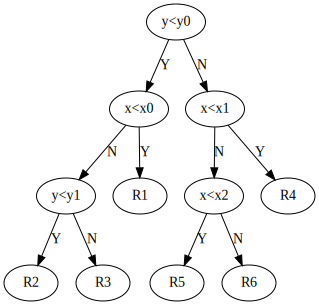

In [11]:
from graphviz import Digraph

def create_decision_tree():
    dot = Digraph()

    # Add nodes
    dot.node('A', 'y<y0')
    dot.node('B', 'x<x0')
    dot.node('C', 'x<x1')
    dot.node('D', 'y<y1')
    dot.node('E', 'x<x2')

    dot.node('R1', 'R1')
    dot.node('R2', 'R2')
    dot.node('R3', 'R3')
    dot.node('R4', 'R4')
    dot.node('R5', 'R5')
    dot.node('R6', 'R6')

    # Add edges
    dot.edge('A', 'B', 'Y')
    dot.edge('A', 'C', 'N')
    dot.edge('B', 'D', 'N')
    dot.edge('B', 'R1', 'Y')
    dot.edge('C', 'R4', 'Y')
    dot.edge('C', 'E', 'N')
    dot.edge('E', 'R5', 'Y')
    dot.edge('E', 'R6', 'N')
    dot.edge('D', 'R2', 'Y')
    dot.edge('D', 'R3', 'N')

    # Save the diagram
    dot.render('decision_tree', format='png', cleanup=True)
    return dot

display(create_decision_tree())

# 2.
It is mentioned in Section 8.2.3 that boosting using depth-one trees
(or stumps) leads to an additive model: that is, a model of the form

$$\begin{align}
    f(X) = \sum_{j=1}^{p} f_j(X_j)
\end{align}$$

Explain why this is the case. You can begin with (8.12) in
Algorithm 8.2.

- Boosted Model $$ \hat{f}(x) = \sum_{b=1}^{B} \lambda \hat{f}^{b}(x)$$
- Tree of Depth 1 $$\hat{f}^{b}(X) = c_{b} \mathbf{1}_{[X_i < c]}(X) + c_{\bar{b}} \mathbf{1}_{[X_i \geq c]} (X)$$
- Function of one variable $$\hat{f}^{b}(X_{b_i}) = c_{b} \mathbf{1}_{[< c]}(X_{b_i}) + c_{\bar{b}} \mathbf{1}_{[\geq c]} (X_{b_i}) \quad b_i \in \{1, \dots, p\}$$
- Each component function is the sum of all the trees which use that feature $$f_j(X_j) = \sum_{\{b_i \in B | b_i = j\}} \lambda \hat{f}^{b}(X_{b_i})$$
- The additive function is the sum of all the component functions $$f(X) = \sum_{j=1}^{p} f_j(X_j)$$


# 3.

Consider the Gini index, classification error, and entropy in a simple
classification setting with two classes. Create a single plot that dis-
plays each of these quantities as a function of p̂m1 . The x-axis should
display p̂m1 , ranging from 0 to 1, and the y-axis should display the
value of the Gini index, classification error, and entropy.
Hint: In a setting with two classes, p̂m1 = 1 − p̂m2 . You could make
this plot by hand, but it will be much easier to make i


- Gini Index - $G(p_{m1}) = \sum_{i=1}^{J} p_i (1 - p_i) = 2 p_{m1} (1 - p_{m1})$
- Classification Error - $E(p_{m1}) = \min(p_{m1}, 1-p_{m1})$
- Entropy - $H(p_{m1}) = - \sum_{i=1}^{J} p_i \log(p_i) = - \left(p_{m1} \log(p_{m1}) + (1 - p_{m1}) \log(1 - p_{m1}) \right)$

/tmp/ipykernel_88931/729180427.py:11: RuntimeWarning: divide by zero encountered in log
  return -p*np.log(p) - (1-p)*np.log(1-p)
/tmp/ipykernel_88931/729180427.py:11: RuntimeWarning: invalid value encountered in multiply
  return -p*np.log(p) - (1-p)*np.log(1-p)


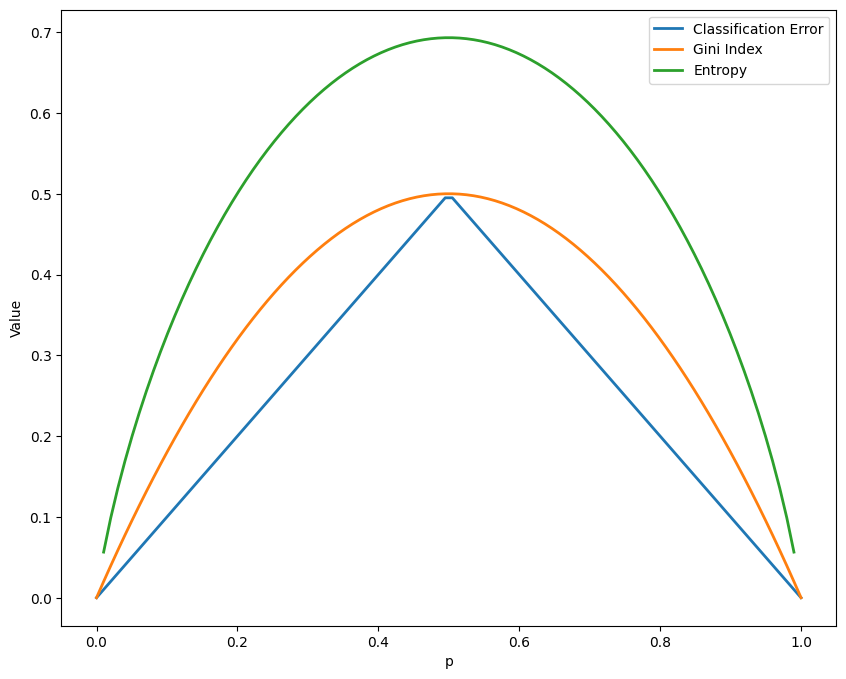

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def classification_error(p):
    return np.minimum(p, 1-p)

def gini_index(p):
    return 2*p*(1-p)

def entropy(p):
    return -p*np.log(p) - (1-p)*np.log(1-p)

p = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 8))
plt.plot(p, classification_error(p), label='Classification Error', lw=2)
plt.plot(p, gini_index(p), label='Gini Index', lw=2)
plt.plot(p, entropy(p), label='Entropy', lw=2)
plt.xlabel('p')
plt.ylabel('Value')
plt.legend()
plt.show()

# 4.
This question relates to the plots in Figure 8.14.

(a) Sketch the tree corresponding to the partition of the predictor
space illustrated in the left-hand panel of Figure 8.14. The numbers inside the boxes indicate the mean of Y within each region.

(b) Create a diagram similar to the left-hand panel of Figure 8.14,
using the tree illustrated in the right-hand panel of the same
figure. You should divide up the predictor space into the correct
regions, and indicate the mean for each region.

![image](images/q4.png)

## 4b.

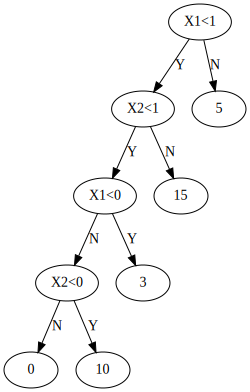

In [21]:
def draw_tree():
    dot = Digraph()

    # Add nodes
    dot.node('A', 'X1<1')
    dot.node('B', 'X2<0')
    dot.node('C', 'X2<1')
    dot.node('D', 'X1<0')

    dot.node('0', '0')
    dot.node('3', '3')
    dot.node('5', '5')
    dot.node('10', '10')
    dot.node('15', '15')

    # Add edges
    dot.edge('A', '5', 'N')
    dot.edge('A', 'C', 'Y')
    dot.edge('C', '15', 'N')
    dot.edge('C', 'D', 'Y')
    dot.edge('D', '3', 'Y')
    dot.edge('D', 'B', 'N')
    dot.edge('B', '10', 'Y')
    dot.edge('B', '0', 'N')
             

    # Save the diagram
    dot.render('decision_tree', format='png', cleanup=True)
    return dot


display(draw_tree())

 ## 4b.
 ```                                
      4┌────────────────────────┐     
       │                        │     
       │                        │     
       │                        │     
      3│          2.49          │     
       │                        │     
       │                        │     
       │                        │     
 X2   2├──────┬─────────────────┤     
       │      │                 │     
       │ -1.06│      0.21       │     
       │      │                 │     
      1├──────┴─────┬───────────┤     
       │            │           │     
       │   -1.80    │   0.63    │     
       │            │           │     
      0└────────────┴───────────┘     
       -1     0     1    2     3      
                                      
                   X1                 
```

# 5.

Suppose we produce ten bootstrapped samples from a data set
containing red and green classes. We then apply a classification tree
to each bootstrapped sample and, for a specific value of X, produce
10 estimates of

P (Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.

There are two common ways to combine these results together into a
single class prediction. One is the majority vote approach discussed in
this chapter. The second approach is to classify based on the average
probability. In this example, what is the final classification under each
of these two approaches?

In [24]:
nums = [0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75]
majority_vote = sum([x >= 0.5 for x in nums]) > len(nums) / 2
average_prob = sum(nums) / len(nums) >= 0.5

print("Majority Vote Result:", majority_vote)
print("Average Probability Result:", average_prob)

Majority Vote Result: True
Average Probability Result: False


## 6.
Provide a detailed explanation of the algorithm that is used to fit a regression tree.

- Consider all splits for each feature $(X_i, d)$
- For each split divide the data into two subsets based on the feature threshold
- Calculate SSE for each subset
$$
SSE = \sum_{i=1}^{n} (y_i - \bar{y}) ** 2
$$
- The split resulting in the lowest total $SSE$ is chosen as the best split
- Recurse for each child node, using the split subsets as the new dataset
- Repeat until a stopping criteria (minimum number of samples in a node, max depth)
- Set prediction value to be the mean of the target values in a node
